Lab 7 (Reddit)

This script connect to Reddit API and crawls posts based on search terms.

Ref: http://www.storybench.org/how-to-scrape-reddit-with-python/

In [ ]:
import praw
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
#App Related Authentication variables


secret = "xxxxx"
personal_use_script = "xxxxx"
user_name = "xxxx"
password = "xxxx"

'''
Getting Reddit and subreddit instances

PRAW stands for Python Reddit API Wrapper.

First, we connect to Reddit by calling the praw.Reddit function and storing it in a variable.

I’m calling mine reddit. You should pass the following arguments to that function:
'''

reddit = praw.Reddit(client_id=personal_use_script, \
                     client_secret=secret, \
                     user_agent='MLBB', \
                     username=user_name, \
                     password=password)

In [128]:
'''
From that, we use the same logic to get to the subreddit we want and 
call the .subreddit instance from reddit and pass it the name of the subreddit we want to access.

It can be found after “r/” in the subreddit’s URL.
I’m going to use r/singapore, one of the subreddits we used in the story.
Assign a new variable like this:
'''
subreddit = reddit.subreddit('singapore')
results = subreddit.search('elderly',limit=50)

post_titles = []
score_list = []
body_list = []

for post in results:
    post_titles.append(post.title)
    score_list.append(post.score)
    print(post.title)
    body_list.append(post.selftext)

Let's all agree that the seat on the picture's left is everyone's favourite seat in the MRT. (Besides the elderly)
PMD rider to be charged in court over allegedly hitting elderly pedestrian with belt buckle in dispute
To all fathers, mothers, parents of young children, sons and daughters of elderly parents. Do you stock up on food essentials during this DORSCON Orange period?
Okayyyy. What do you think? Was this ad meant to tell elderly it's ok to work at such an age, OR, an insult to those deserving of a retirement after working for so long?
Felt pretty sad when an elderly lady came up to me asking for my leftovers.
Elderly man on PMA swipes wallet from Waterway Point store, puts it in bag before riding away
Police report made after elderly man on PMA tries to hit SMRT staff at Bugis station
Are there any low cost (or free) weekly/daily physical/fun events targeted at elderly in Singapore?
Singapore’s Elderly Orphans: Vulnerable, Isolated, and Afraid of Dying Alone
Maid jailed for abu

In [129]:
score_arr = np.array(score_list)
post_arr = np.array(post_titles)
body_arr = np.array(body_list)

df = pd.DataFrame({"topic":post_arr,"score":score_arr,"content":body_arr})
for s in df.sort_values("score",ascending=0)["topic"].head(30):
    print(s)


Researchers wanted to find out if pictograms could work with elderly patients. Responses were interesting.
Elderly on MRT trains. Why some of them refuse to sit down.
Let's all agree that the seat on the picture's left is everyone's favourite seat in the MRT. (Besides the elderly)
Elderly hawker allegedly passed away after working 18-hour days to avoid hefty fine when NTUC Foodfare rejected appeal to shorten operating hours
Life imitating art
[Tulan Tuesday Tirade] Entitled Elderlies
On scalpers re-selling hygiene products and face masks on platforms like Carousell
Rant on masks
'Ashamed of being Singaporean': Blogger highlights bad behaviour at Sembawang Hot Spring Park
My grandma now believes that raw onions can keep the flu virus away - because of a whatsapp chain message
Elderly man seen abusing a cat in Marsiling, as he kicks it and walks away
A Friend In Death: He Buries Singapore's Lonely Elderly Poor With No Family
Any one who are, has friends or relatives returning from China 

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

In [131]:
content =  ""


boomer_count = 0
for topics in post_titles:
    content += topics + " "
    
    if "boomer" in topics:
        boomer_count += 1
print(boomer_count)

for text in body_list:
    content += text + " "
    
    if "boomer" in text:
        #print(text)
        boomer_count += 1
print(boomer_count)


tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(content)


stop_words = stopwords.words('english')


extra_stop = ["tell","baby","work","back","everyone","person","see","going","become","wanted","saw","told","really","still","something","around","even","one","stop","say","said","many","use","like","ideas","thing","anything"
              "ho","co","in","or","will","could","well","says","cid","url","content","people","despite","want","us","instead","much","quite","got",
              "https","www","ura","gov","sg","singaporean","singapore","death","anyone","make","non","fine","x200b","know","someone",
              "anything","actually","look","given","fact","asked","gay","think","without","made","give","man","might","need"
             ]

words_filtered = []

for w in words:
    w = w.lower()
    if w not in stop_words and w not in extra_stop:
        words_filtered.append(w)
        


words_joined = " ".join([w for w in words_filtered])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(words_joined)



1
1


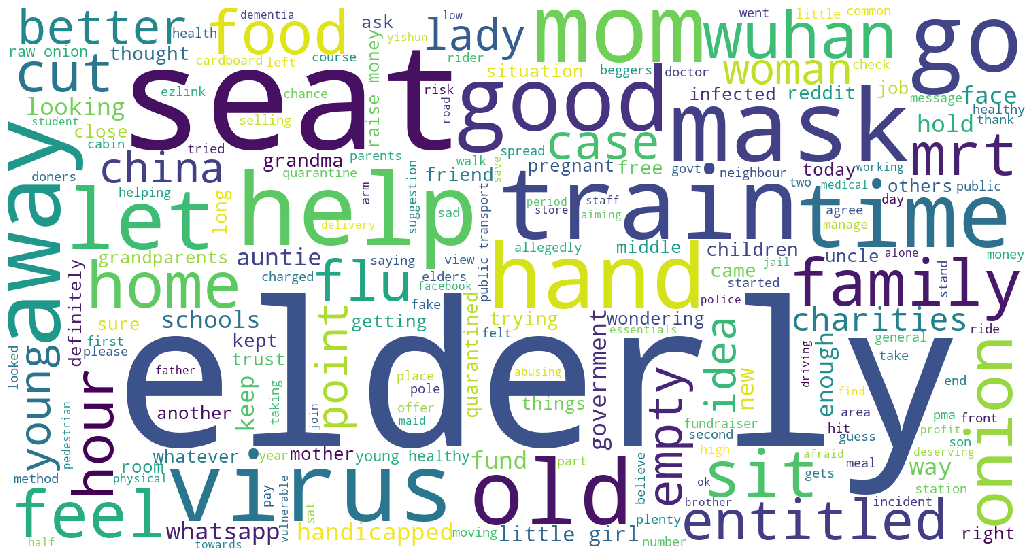

In [132]:
plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
'''
Accessing the threads

Each subreddit has five different ways of organizing the topics created by redditors:
.hot, .new, .controversial, .top, .gilded

You can also use .search("SEARCH_KEYWORDS") to get only results matching an engine search.

Let’s just grab the most up-voted topics all-time with the below.

This will return a list-like object with the top-100 submission in r/singapore
'''
top_subreddit = subreddit.top()

In [ ]:
'''
You can control the size of the sample by passing a limit to .top(),
but be aware that Reddit’s request limit* is 1000, like this:
'''
top_subreddit = subreddit.top(limit=500)

In [ ]:
'''
Parsing and downloading the data

We are right now really close to getting the data in our hands.
Our top_subreddit object has methods to return all kinds of information from each submission.
You can check it for yourself with these simple two lines:
'''
for submission in subreddit.top(limit=10):
    print(submission.title, submission.id)

In [ ]:
'''
We will scrape this information about the topics:
  title, score, url, id, number of comments, date of creation, body text
  
This can be done very easily with a for lop just like above, but 
first we need to create a place to store the data.

In Python, that is usually done with a dictionary. Let’s create it with the following code:
'''
topics_dict = { "author": [],
                "title":[],
                "score":[],
                "id":[], "url":[],
                "comms_num": [],
                "created": [],
                "body":[]}

In [ ]:
'''
Now we are ready to start scraping the data from the Reddit API.
We will iterate through our top_subreddit object and append the information to our dictionary.
'''
for submission in top_subreddit:
    topics_dict["author"].append(submission.author)
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [ ]:
'''
Python dictionaries, however, are not very easy for us humans to read.
This is where the Pandas module comes in handy.
We’ll finally use it to put the data into something that
looks like a spreadsheet — in Pandas, we call those Data Frames.
'''
topics_data = pd.DataFrame(topics_dict)

In [ ]:
'''
The data now looks like this:
'''
topics_data

In [ ]:
'''
Fixing the date column

Reddit uses UNIX timestamps to format date and time. 
Instead of manually converting all those entries, or using a site like 
www.unixtimestamp.com, we can easily write up a function in Python to automate that process.

We define it, call it, and join the new column to dataset with the following code:
'''

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = topics_data["created"].apply(get_date)

topics_data = topics_data.assign(timestamp = _timestamp)

In [ ]:
'''
The dataset now has a new column that we can understand and is ready to be exported.
'''

topics_data

In [ ]:
'''
Exporting a CSV

Pandas makes it very easy for us to create data files in various formats,
including CSVs and Excel workbooks.

To finish up the script, add the following to the end.
'''

topics_data.to_csv('Lab7_Reddit_output.csv', index=False) 

In [ ]:
'''
Retrieving a particular submission
Ref: https://praw.readthedocs.io/en/latest/tutorials/comments.html

Assume we want to process the comments for this submission:

https://www.reddit.com/r/singapore/comments/50ycve/dog_owners_of_singapore_please_help/


First, we need to obtain a submission object. There are 2 ways to do this.
1) Retrieve by URL
2) Retrieve by submission ID (which we happen to know, it is '50ycve')
'''

submission = reddit.submission(url='https://www.reddit.com/r/singapore/comments/50ycve/dog_owners_of_singapore_please_help/')
#submission = reddit.submission(id='50ycve')

In [ ]:
'''
With a submission object we can then interact with its CommentForest
through the submission’s comments attribute. 

A CommentForest is a list of top-level comments each of which contains a CommentForest of replies.

If we wanted to output only the body of the top level comments in the thread we could do:
'''
for top_level_comment in submission.comments:
    print(top_level_comment.body)

In [ ]:
'''
While running this you will most likely encounter the exception

AttributeError: 'MoreComments' object has no attribute 'body'

This submission’s comment forest contains a number of MoreComments objects.

These objects represent the “load more comments”, and “continue this thread” links 
encountered on the website.

While we could ignore MoreComments in our code, like so:
'''
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

In [ ]:
'''
A limit of None means that all MoreComments objects will be replaced until there are none left,
as long as they satisfy the threshold.
'''
from praw.models import MoreComments

submission.comments.replace_more(limit=None)

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

In [ ]:
'''
Now we are able to successfully iterate over all the top-level comments.

What about their replies? We could output all second-level comments like so:
'''
from praw.models import MoreComments

submission.comments.replace_more(limit=None)

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    
    print("=========== Top Level Comment ===========")
    print(top_level_comment.body)
    
    for second_level_comment in top_level_comment.replies:
        print("      ############ Second Level Comment ############")
        print(second_level_comment.body)

In [ ]:
'''
However, the comment forest can be arbitrarily deep, so we’ll want a more robust solution.

One way to iterate over a tree, or forest, is via a breadth-first traversal using a queue:
'''
submission.comments.replace_more(limit=None)
comment_queue = submission.comments[:]  # Seed with top-level
while comment_queue:
    comment = comment_queue.pop(0)
    print(comment.body)
    comment_queue.extend(comment.replies)

In [ ]:
'''
The above code will output all the top-level comments, followed by second-level, third-level, etc. 

While it is awesome to be able to do your own breadth-first traversals, 
CommentForest provides a convenience method, list(), which returns a list of comments 
traversed in the same order as the code above.

Thus the above can be rewritten as:
'''

submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print("=== Author: ", comment.author, "===")
    print(comment.body)

You can now properly extract and parse all (or most) of the comments belonging to a single submission.

For more information about what attributes you can crawl:

1) Submission
https://praw.readthedocs.io/en/latest/code_overview/models/submission.html

2) Comment
https://praw.readthedocs.io/en/latest/code_overview/models/comment.html
